# **Rúbrica y presentación**

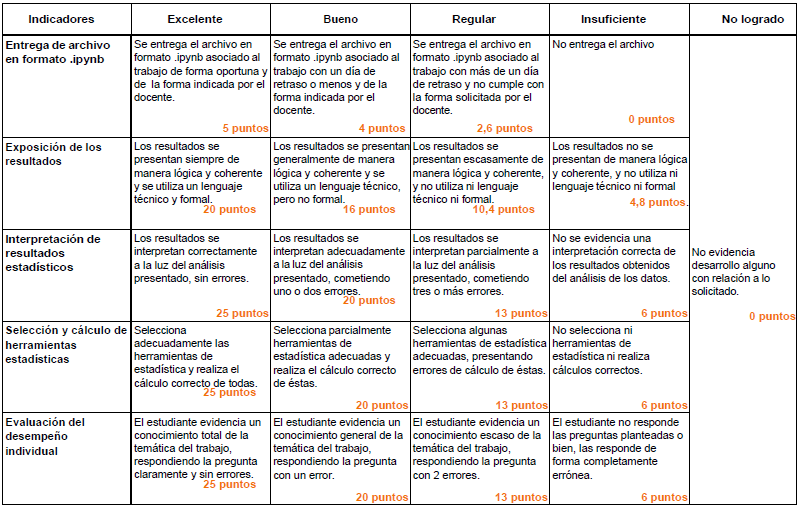

Presentación:
https://www.canva.com/design/DAGyny2prSE/mb1YywlQznA7Goh9UGAR6g/edit?utm_content=DAGyny2prSE&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

https://matplotlib.org/stable/plot_types/index

https://seaborn.pydata.org/

### **Ítem 1**

Describir de modo general el conjunto de datos a partir de un análisis descriptivo de cada una de las variables que usted considere más relevantes para este fin. Deberá comentar cada resultado, gráfico o tabla según los aspectos que considere más interesantes o relevantes. Registrar por escrito los comentarios. En este análisis debe incluir:

1.  Gráficos.
2.   Tablas de frecuencia, con una o más variables.
3.   Medidas de tendencia central.
4.   Percentiles.
5.   Medidas de dispersión.
6.   Otros resúmenes.




### **Ítem 2**

Investigar y responder las siguientes preguntas. Justificar claramente.

1.  ¿Hay áreas del conocimiento donde las carreras sean más caras? Expliquen qué criterio diseñaron para responder la pregunta.
2.  ¿Qué influencia tiene la edad en el tipo de institución a la que ingresan los estudiantes?
3.  ¿Hay carreras cuyo arancel sea sustantivamente más caro que la mayoría de los aranceles? ¿Qué explicación pueden encontrar? Consideren qué variables de la base de datos los puede ayudar y el contexto de la región que les tocó trabajar.

# **Código**

Carga de datos

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataFrame = pd.read_excel("01_MATRICULAS_ED_SUPERIOR_ARICA_Y_PARINACOTA_2021.xlsx")
dataFrame.describe() #para ver todos los valores del df

,ID,EDAD,AÑO INGRESO,AÑOS DE ACREDITACION,DURACION PLAN DE ESTUDIO (SEMESTRES),DURACION PROCESO TITULACION (SEMESTRES),DURACION TOTAL CARRERA (SEMESTRES),VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS)
count,1.411600e+04,14116.000000,14116.000000,11773.000000,14116.000000,14116.000000,14116.000000,14116.000000,1.411600e+04
mean,5.232222e+05,25.541867,2019.239232,5.031513,8.239586,0.754676,8.280958,131952.353783,2.714574e+06
std,3.035715e+05,7.431416,2.017899,0.739711,2.590532,0.674280,2.599160,63717.983705,9.567505e+05
min,1.000000e+00,18.000000,2004.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,2.593842e+05,21.000000,2018.000000,5.000000,5.000000,0.000000,5.000000,116000.000000,1.850000e+06
50%,5.228475e+05,23.000000,2020.000000,5.000000,9.000000,1.000000,9.000000,155000.000000,2.857000e+06
75%,7.854038e+05,28.000000,2021.000000,5.000000,10.000000,1.000000,10.000000,155000.000000,3.533000e+06
max,1.048335e+06,75.000000,2021.000000,7.000000,14.000000,5.000000,14.000000,290504.000000,5.595000e+06


Antes de empezar a trabajar, debemos de tener en cuenta la población y muestra y los tipos de datos con los que estamos trabajando. 

Nuestra población son todos los estudiantes matriculados en instituciones de educación superior en la región de Arica y Parinacota durante el año 2021 y nuestra muestra son todos lodatos que nos entrega la base de datos.

Por otro lado, tenemos todos los tipos de variables cualitativas y cuantitativas de nuestra BD. Entre las cualitativas nominales están el ID, género, institución, carrera y ubicaciónmientras que las ordinales incluyen la acreditación y rangos de edad. Las variables cuantitativas discretas abarcan edad, año y semestre de ingreso, duración de la carrera y acreditacióny las continuas incluyen montos como matrícula y arancel anual.

## ***Contexto Demográfico***

### Género de los estudiantes

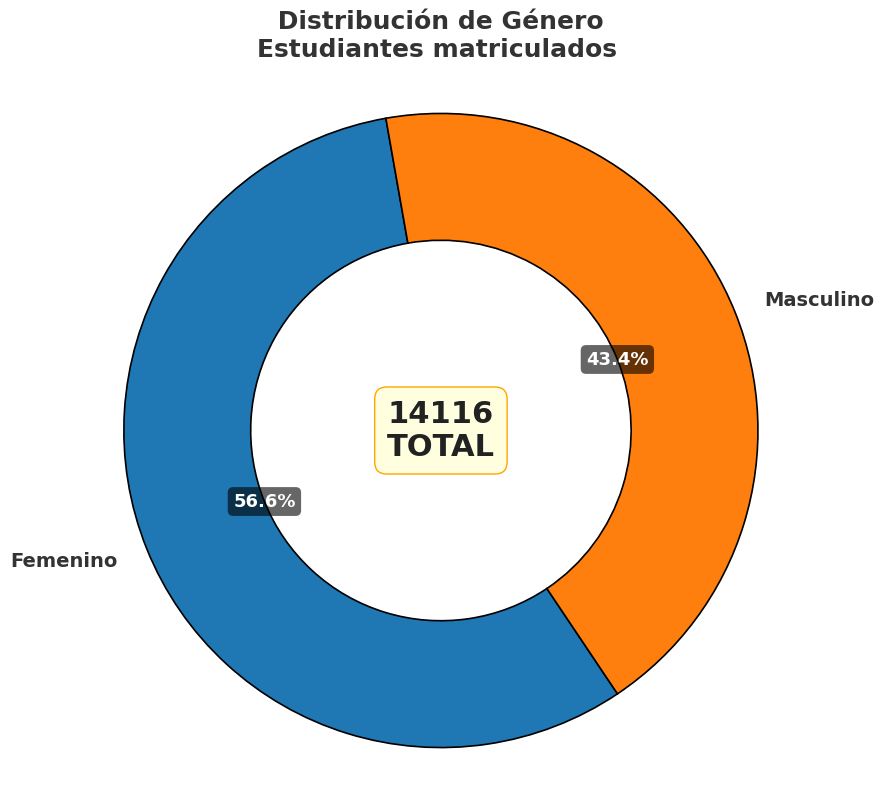

In [14]:
# Distribución de género de los estudiantes
encuestados = dataFrame.groupby("GENERO").size().reset_index(name='Frecuencia Absoluta')
encuestados['Frecuencia Relativa'] = round(encuestados['Frecuencia Absoluta'] / encuestados['Frecuencia Absoluta'].sum(), 4) * 100
encuestados['Frecuencia Acumulada Absoluta'] = encuestados['Frecuencia Absoluta'].cumsum()
encuestados['Frecuencia Acumulada Relativa'] = encuestados['Frecuencia Relativa'].cumsum()

plt.figure(figsize=(9,9))
wedges, texts, autotexts = plt.pie(
    encuestados['Frecuencia Absoluta'],
    labels=encuestados['GENERO'],
    autopct='%1.1f%%',
    startangle=100,
    wedgeprops=dict(width=0.4, edgecolor="black", linewidth=1.2)
)
#Título
plt.title(' Distribución de Género \nEstudiantes matriculados ',
          fontsize=18, fontweight='bold', color="#333", pad=20)

#texto en el centro
total = encuestados['Frecuencia Absoluta'].sum()
plt.text(0, 0, f"{total}\nTOTAL", ha='center', va='center',
         fontsize=22, fontweight='bold', color="#222",
         bbox=dict(boxstyle="round,pad=0.4", facecolor="lightyellow", edgecolor="orange"))

#Para ajustar las etiquetas
for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')
    text.set_color("#333")

#Ajuste de porcentajes
for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_color("white")
    autotext.set_weight("bold")
    autotext.set_bbox(dict(boxstyle="round,pad=0.3", facecolor="black", edgecolor="none", alpha=0.6))

plt.axis('equal')
plt.show()


### Edades

,RANGO EDAD,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada Absoluta,Frecuencia Acumulada Relativa
0,15 a 19,2429,17.21,2429,17.21
1,20 a 24,6558,46.46,8987,63.67
2,25 a 29,2387,16.91,11374,80.58
3,30 a 34,1130,8.01,12504,88.59
4,35 a 39,720,5.10,13224,93.69
5,40 y mas,892,6.32,14116,100.01


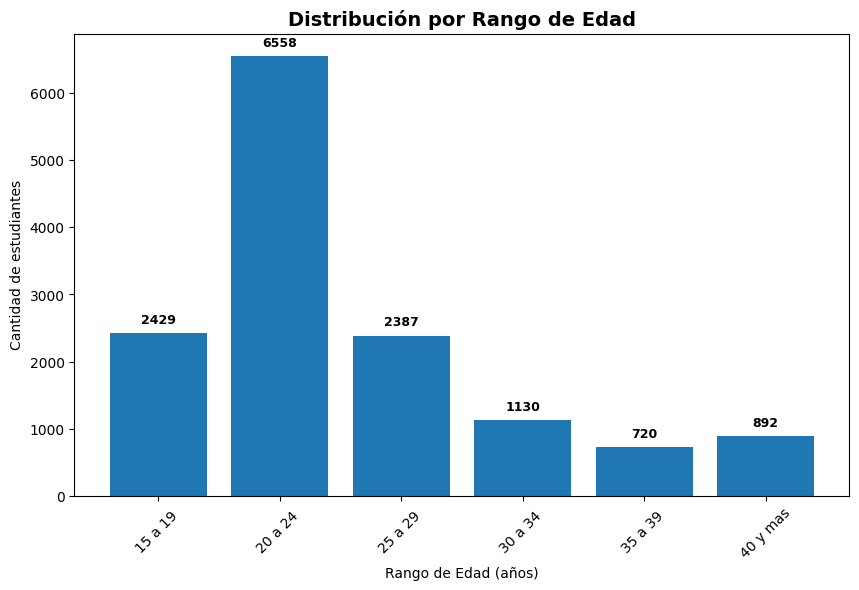

In [37]:
# Distribución de edades de los estudiantes
edades = dataFrame.groupby("RANGO EDAD").size().reset_index(name='Frecuencia Absoluta')
edades['Frecuencia Relativa'] = round(edades['Frecuencia Absoluta'] / edades['Frecuencia Absoluta'].sum(), 4)*100
edades['Frecuencia Acumulada Absoluta'] = edades['Frecuencia Absoluta'].cumsum()
edades['Frecuencia Acumulada Relativa'] = edades['Frecuencia Relativa'].cumsum()

# Percentiles
p25 = np.percentile(edades['Frecuencia Absoluta'], 25)
p50 = np.percentile(edades['Frecuencia Absoluta'], 50)
p75 = np.percentile(edades['Frecuencia Absoluta'], 75)
p100 = np.percentile(edades['Frecuencia Absoluta'], 100)

display(edades)

# Gráfico de barras con Matplotlib
plt.figure(figsize=(10,6))
bars = plt.bar(edades["RANGO EDAD"], edades["Frecuencia Absoluta"])

plt.title("Distribución por Rango de Edad", fontsize=14, fontweight="bold")
plt.xlabel("Rango de Edad (años)")
plt.ylabel("Cantidad de estudiantes")
plt.xticks(rotation=45)

# Mostrar los números encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, 
             f"{int(yval)}", ha='center', va='bottom',
             fontsize=9, fontweight="bold", color="black")

plt.show()


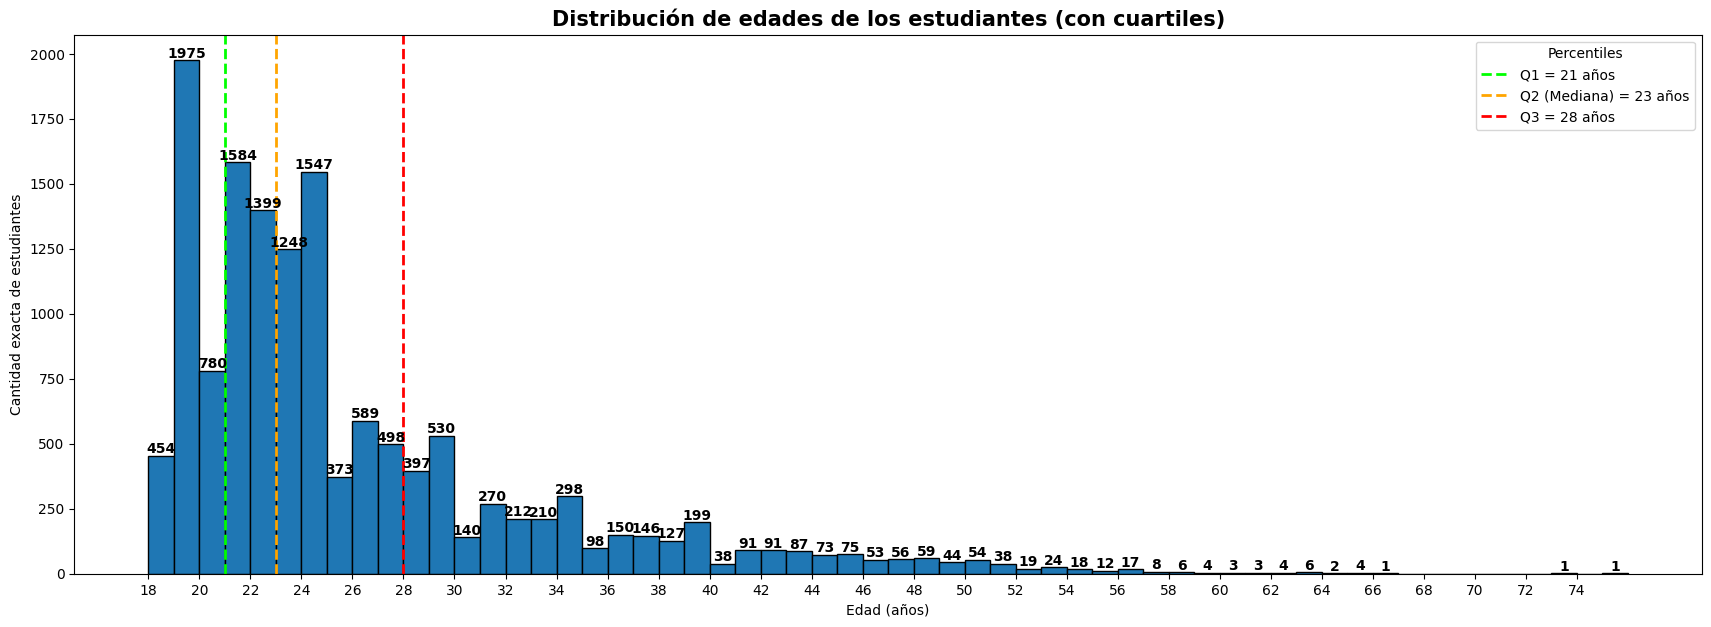

In [38]:
# Histograma de edades con cuartiles
edades = dataFrame['EDAD']

# Cálculo de cuartiles
p25 = np.percentile(edades, 25)
p50 = np.percentile(edades, 50)
p75 = np.percentile(edades, 75)

plt.figure(figsize=(21,7))
counts, bins, bars = plt.hist(
    edades, 
    bins=range(edades.min(), edades.max()+2), 
    color="#1f77b4", 
    edgecolor="black"
)

# Agregar los valores exactos arriba de cada barra
for count, x in zip(counts, bins[:-1]):
    if count > 0:  # solo muestro donde haya datos
        plt.text(
            x + 0.5,        # centro de la barra
            count + 10,     # un poquito arriba de la barra
            int(count),     # el valor exacto
            ha="center", fontsize=10, fontweight="bold"
        )

# Líneas de cuartiles con sus etiquetas
plt.axvline(p25, color='lime', linestyle="--", linewidth=2, label=f"Q1 = {int(p25)} años")
plt.axvline(p50, color='orange', linestyle="--", linewidth=2, label=f"Q2 (Mediana) = {int(p50)} años")
plt.axvline(p75, color='red', linestyle="--", linewidth=2, label=f"Q3 = {int(p75)} años")

plt.title("Distribución de edades de los estudiantes (con cuartiles)", fontsize=15, fontweight="bold")
plt.xlabel("Edad (años)")
plt.ylabel("Cantidad exacta de estudiantes")
plt.xticks(range(edades.min(), edades.max()+1, 2))
plt.legend(title="Percentiles", loc="upper right")

plt.show()


### Modalidad de estudio de los estudiantes

          JORNADA  Frecuencia Absoluta  Frecuencia Relativa  \
0          Diurno                 9961            70.565316   
1            Otro                   47             0.332956   
2  Semipresencial                    4             0.028337   
3      Vespertino                 4104            29.073392   

   Frecuencia Acumulada Absoluta  
0                           9961  
1                          10008  
2                          10012  
3                          14116  


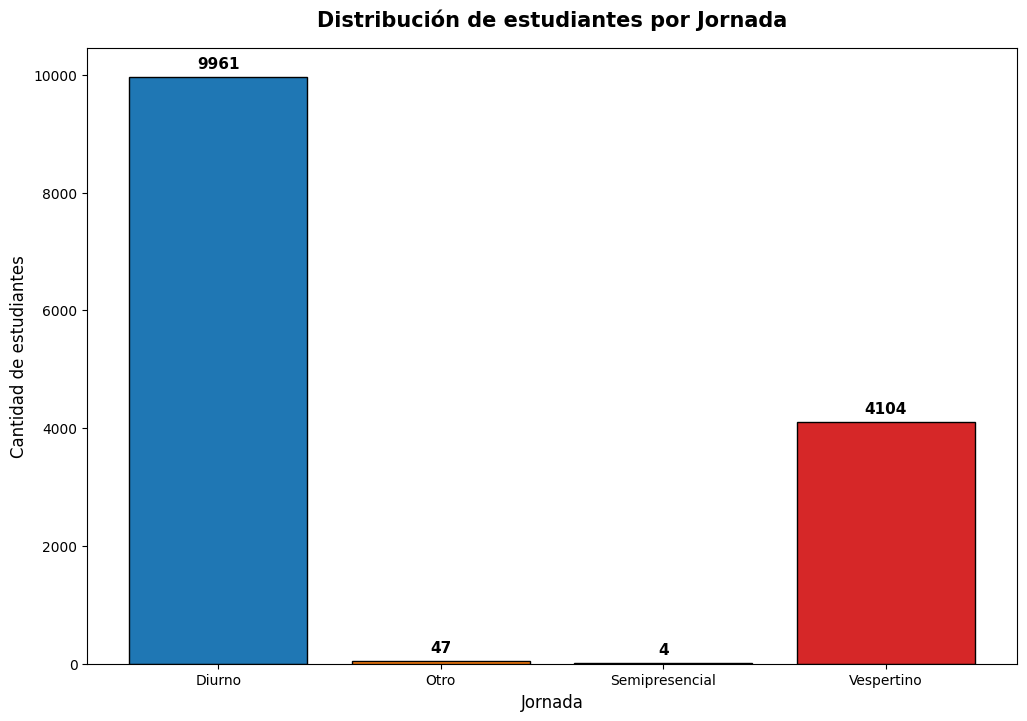

In [17]:
# Modalidad de estudio de los estudiantes
jornada = dataFrame.groupby("JORNADA").size().reset_index(name='Frecuencia Absoluta')
jornada['Frecuencia Relativa'] = (jornada['Frecuencia Absoluta'] / jornada['Frecuencia Absoluta'].sum()) * 100
jornada['Frecuencia Acumulada Absoluta'] = jornada['Frecuencia Absoluta'].cumsum()

print(jornada)

#Colores distintos para cada barra
colores = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

plt.figure(figsize=(12,8))

#Barras con colores personalizados
barras = plt.bar(jornada['JORNADA'], jornada['Frecuencia Absoluta'], color=colores, edgecolor="black")

#Título y labels
plt.title("Distribución de estudiantes por Jornada", fontsize=15, fontweight="bold", pad=15)
plt.xlabel("Jornada", fontsize=12)
plt.ylabel("Cantidad de estudiantes", fontsize=12)

#Agregar números exactos arriba de cada barra
for i, bar in enumerate(barras):
    altura = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # posición x (centro de la barra)
        altura + 100,                     # un poquito arriba de la barra
        str(int(altura)),                 # el número exacto
        ha='center', va='bottom', fontsize=11, fontweight="bold"
    )

plt.show()


## ***Contexto Educativo***

### Tipo de Institución

,TIPO DE INSTITUCION,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada Absoluta,Frecuencia Acumulada Relativa
0,Centros de Formacion Tecnica,3594,25.46,3594,25.46
1,Institutos Profesionales,1430,10.13,5024,35.59
2,Universidades CRUCH,7849,55.60,12873,91.19
3,Universidades Privadas,1243,8.81,14116,100.00


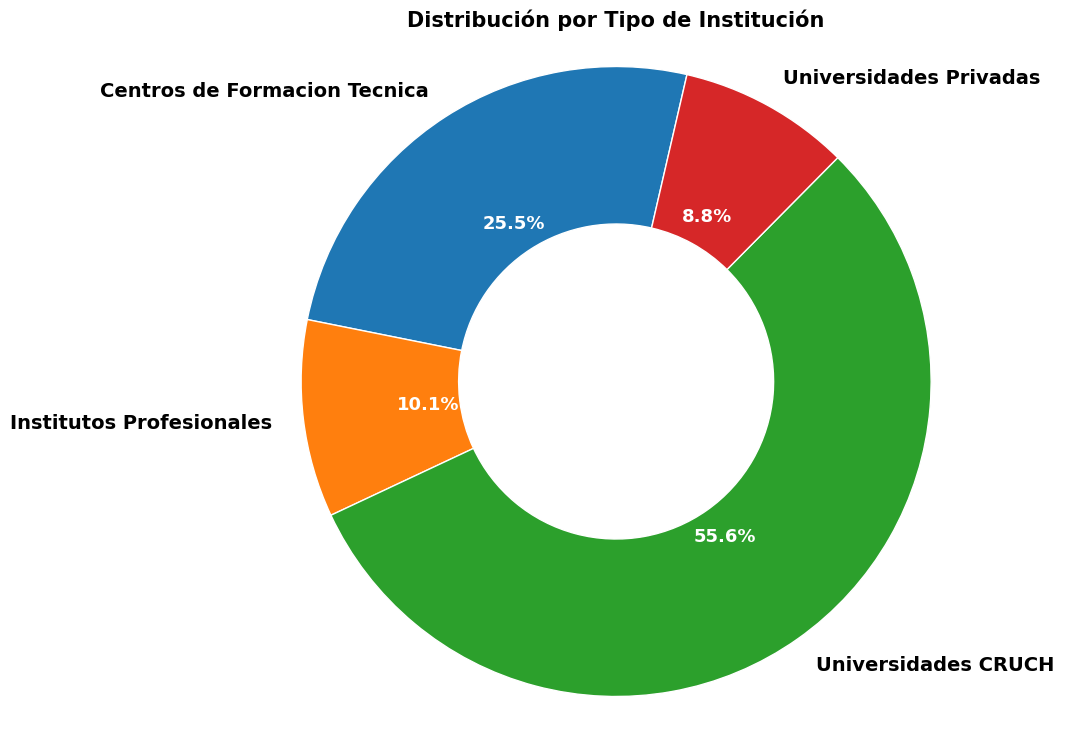

In [18]:
# Tipo de institución
institucion = dataFrame.groupby("TIPO DE INSTITUCION").size().reset_index(name='Frecuencia Absoluta')
institucion['Frecuencia Relativa'] = round(institucion['Frecuencia Absoluta'] / institucion['Frecuencia Absoluta'].sum(), 4)*100
institucion['Frecuencia Acumulada Absoluta'] = institucion['Frecuencia Absoluta'].cumsum()
institucion['Frecuencia Acumulada Relativa'] = institucion['Frecuencia Relativa'].cumsum()

print("\n")
display(institucion)
print("\n\n")

plt.figure(figsize=(12,9))

wedges, texts, autotexts = plt.pie(
    institucion['Frecuencia Relativa'],
    labels=institucion['TIPO DE INSTITUCION'],
    autopct='%1.1f%%',
    startangle=77,
    wedgeprops=dict(width=0.5, edgecolor="white")
)

plt.title("Distribución por Tipo de Institución", fontsize=15, fontweight="bold")

for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

#porcentajes visibles
for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.axis('equal')  # Mantener la forma circular
plt.show()


### Edad por Área

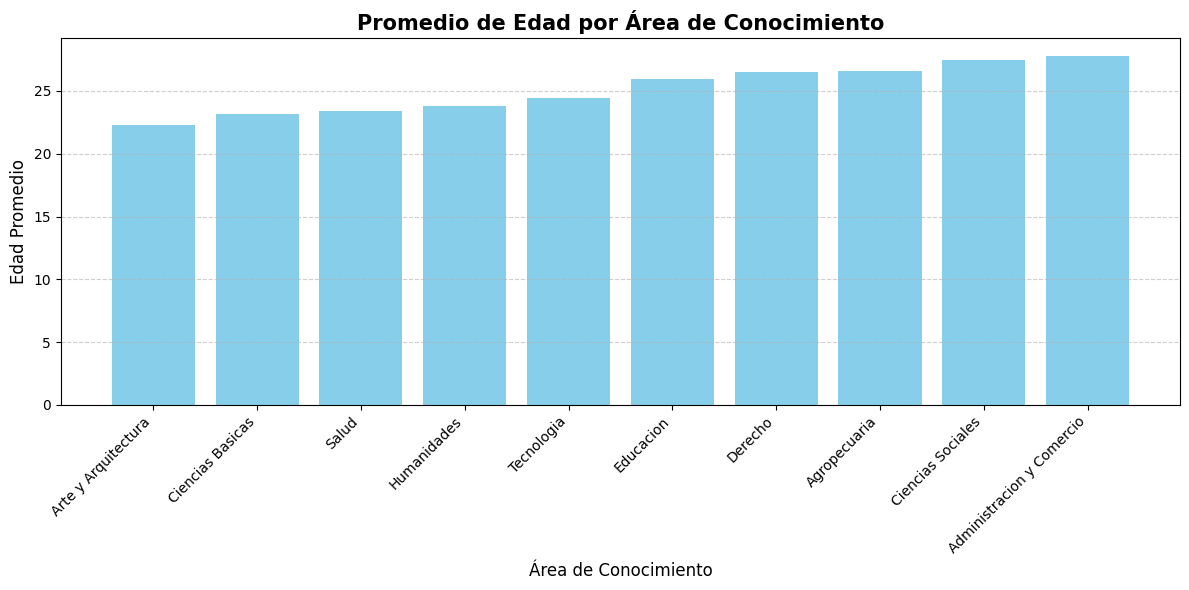

In [88]:

# Calcular promedio de edad por área
promedios = dataFrame.groupby('AREA CONOCIMIENTO')['EDAD'].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(promedios.index, promedios.values, color='skyblue')
plt.title("Promedio de Edad por Área de Conocimiento", fontsize=15, fontweight='bold')
plt.xlabel("Área de Conocimiento", fontsize=12)
plt.ylabel("Edad Promedio", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Nivel Carrera




            NIVEL CARRERA  Frecuencia Absoluta  Frecuencia Relativa  \
0  Carreras Profesionales                10001                70.85   
1       Carreras Tecnicas                 3987                28.24   
2               Doctorado                   16                 0.11   
3                Magister                  111                 0.79   
4               Postitulo                    1                 0.01   

   Frecuencia Acumulada Absoluta  Frecuencia Acumulada Relativa  
0                          10001                          70.85  
1                          13988                          99.09  
2                          14004                          99.20  
3                          14115                          99.99  
4                          14116                         100.00  





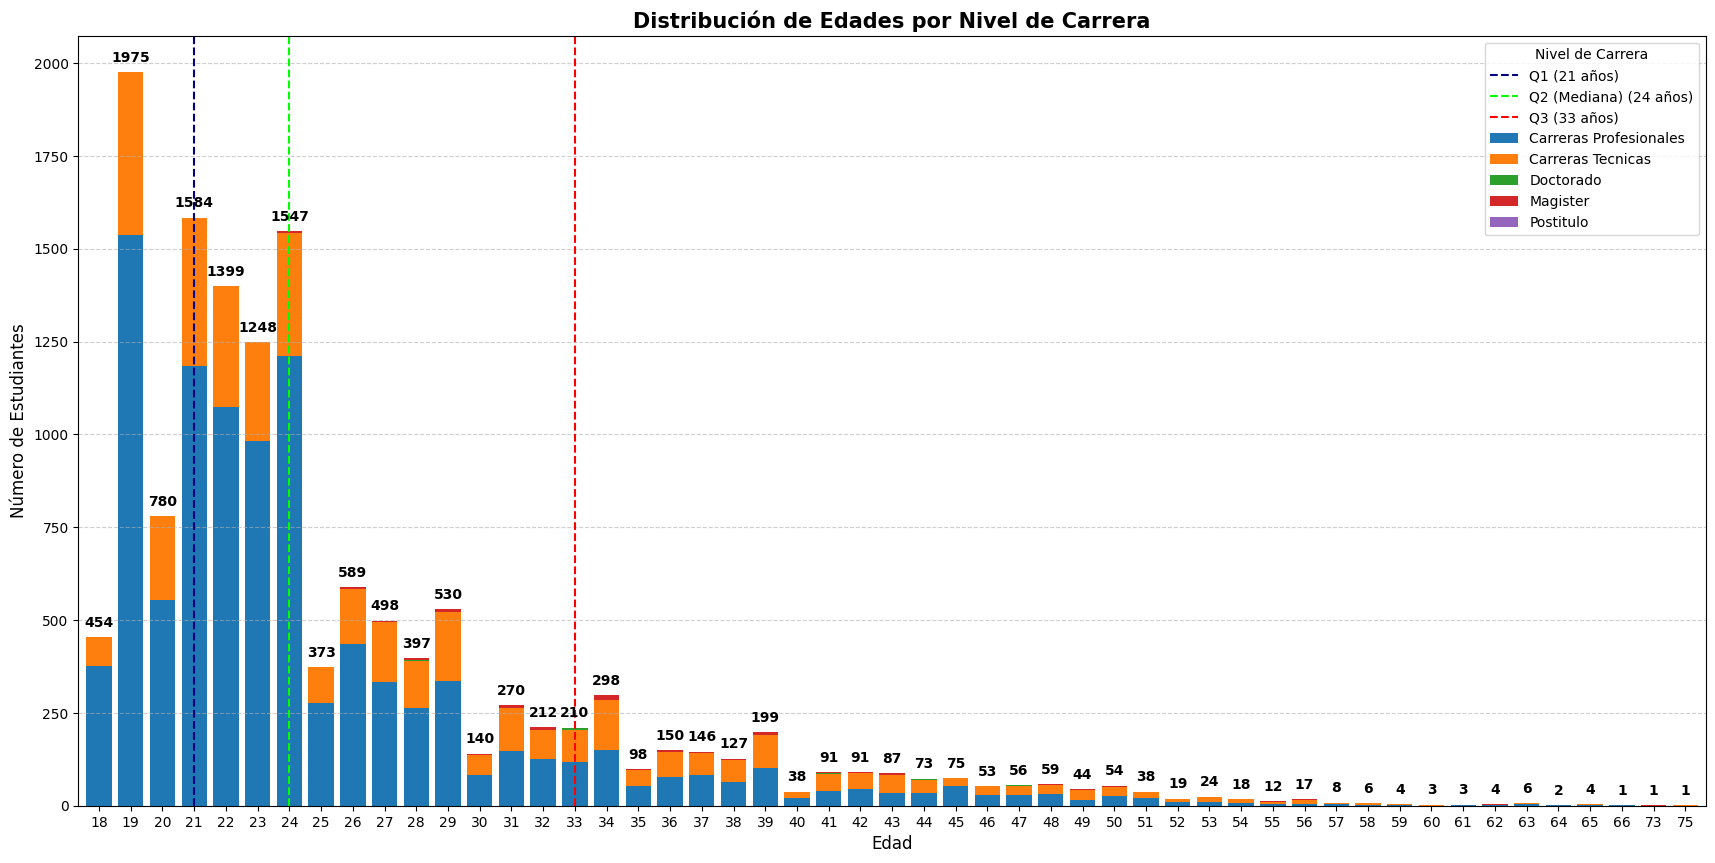

In [86]:
nivel_carrera = dataFrame.groupby("NIVEL CARRERA").size().reset_index(name='Frecuencia Absoluta')
nivel_carrera['Frecuencia Relativa'] = round(nivel_carrera['Frecuencia Absoluta'] / nivel_carrera['Frecuencia Absoluta'].sum(), 4)*100
nivel_carrera['Frecuencia Acumulada Absoluta'] = nivel_carrera['Frecuencia Absoluta'].cumsum()
nivel_carrera['Frecuencia Acumulada Relativa'] = nivel_carrera['Frecuencia Relativa'].cumsum()



print("\n\n")
print(nivel_carrera)
print("\n\n")

# Crear tabla pivote: filas = edad, columnas = nivel de carrera
pivot = dataFrame.pivot_table(index='EDAD', columns='NIVEL CARRERA', aggfunc='size', fill_value=0)

# Definir colores pa' que cada nivel tenga uno distinto
niveles = pivot.columns



# Gráfico de barras apiladas
ax = pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(21,10),      # más ancho y más alto pa’ que respire
    width=0.8            # ancho de las barras (no tan flaco)
)


# Dibujar líneas de percentiles
# Buscar la posición exacta en el eje x correspondiente a cada percentil
def percentile_pos(p):
    # Encuentra la barra más cercana al percentil
    return np.argmin(np.abs(pivot.index - p))

ax.axvline(percentile_pos(p25), color='navy', linestyle='--', linewidth=1.5, label=f'Q1 ({p25:.0f} años)')
ax.axvline(percentile_pos(p50), color='lime', linestyle='--', linewidth=1.5, label=f'Q2 (Mediana) ({p50:.0f} años)')
ax.axvline(percentile_pos(p75), color='red', linestyle='--', linewidth=1.5, label=f'Q3 ({p75:.0f} años)')



plt.title("Distribución de Edades por Nivel de Carrera", fontsize=15, fontweight="bold")
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Número de Estudiantes", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Nivel de Carrera", fontsize=10)


# Mostrar el número total arriba de cada barra
for idx, edad in enumerate(pivot.index):
    total = pivot.loc[edad].sum()
    ax.text(
        idx, total + 20, str(int(total)),  # posición + un poquito arriba
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

plt.show()

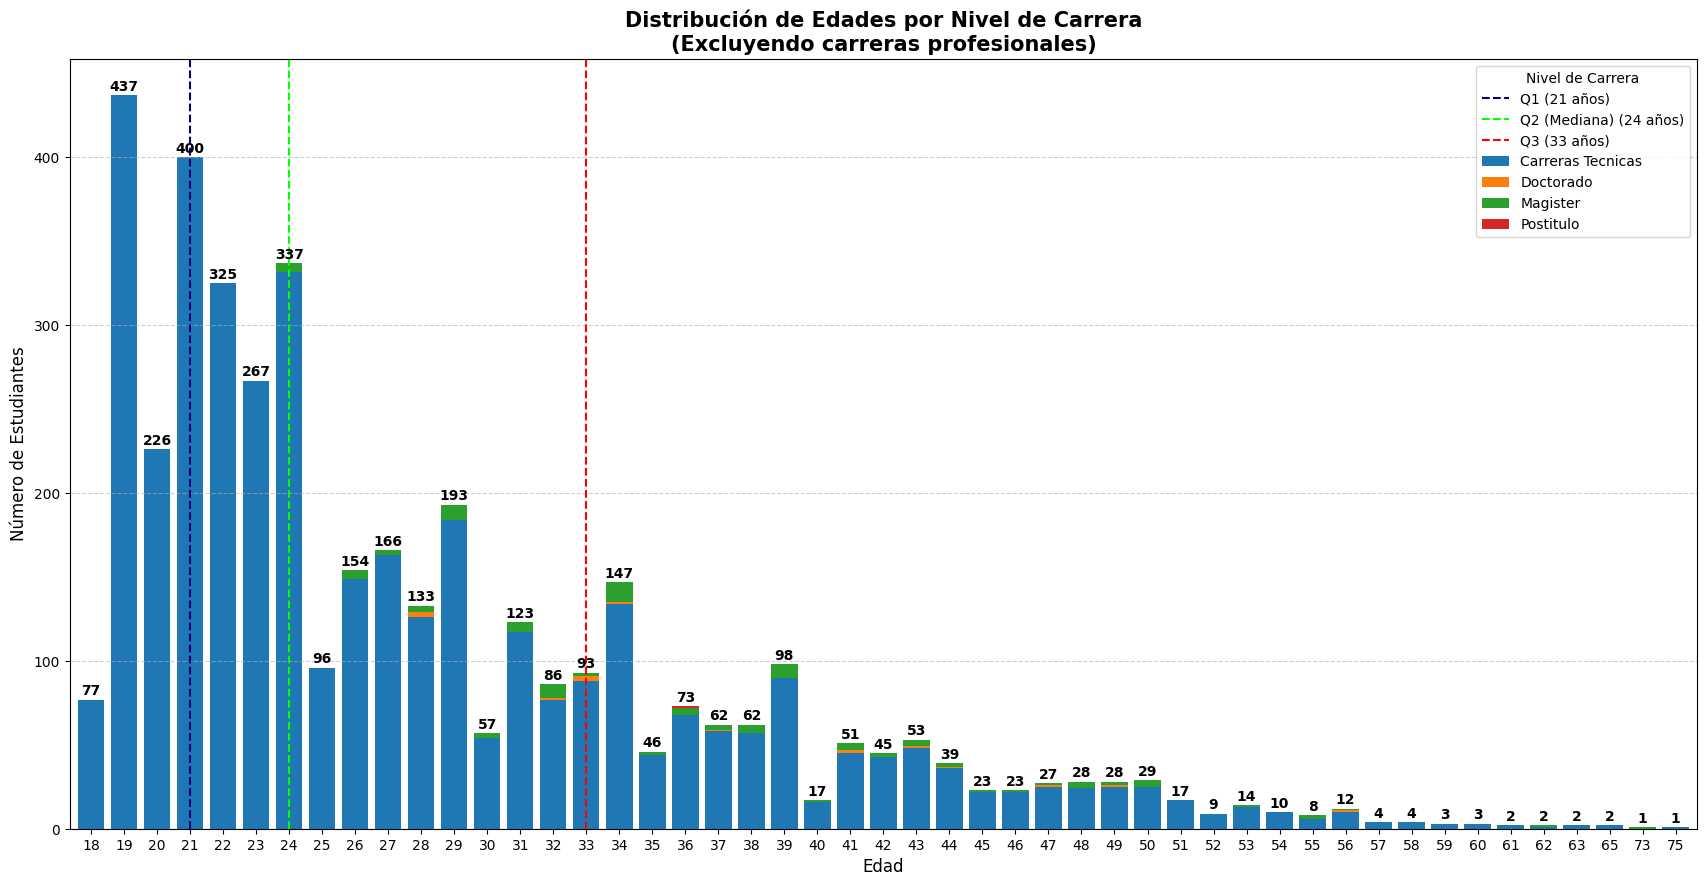

In [ ]:
df_filtrado = dataFrame[(dataFrame['NIVEL CARRERA'] != "Carreras Profesionales")]

pivot = df_filtrado.pivot_table(index='EDAD', columns='NIVEL CARRERA', aggfunc='size', fill_value=0)


p25 = np.percentile(df_filtrado['EDAD'], 25)
p50 = np.percentile(df_filtrado['EDAD'], 50)
p75 = np.percentile(df_filtrado['EDAD'], 75)


# Crear gráfico y obtener el eje
ax = pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(21,10),
    width=0.8,
)

# Totales encima de cada barra
for idx, edad in enumerate(pivot.index):
    total = pivot.loc[edad].sum()
    ax.text(
        idx, total + 1, str(int(total)),
        ha="center", va="bottom",
        fontsize=10, fontweight="bold"
    )

# Dibujar líneas de percentiles
# Buscar la posición exacta en el eje x correspondiente a cada percentil
def percentile_pos(p):
    # Encuentra la barra más cercana al percentil
    return np.argmin(np.abs(pivot.index - p))

ax.axvline(percentile_pos(p25), color='navy', linestyle='--', linewidth=1.5, label=f'Q1 ({p25:.0f} años)')
ax.axvline(percentile_pos(p50), color='lime', linestyle='--', linewidth=1.5, label=f'Q2 (Mediana) ({p50:.0f} años)')
ax.axvline(percentile_pos(p75), color='red', linestyle='--', linewidth=1.5, label=f'Q3 ({p75:.0f} años)')


plt.title("Distribución de Edades por Nivel de Carrera\n(Excluyendo carreras profesionales)", fontsize=15, fontweight="bold")
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Número de Estudiantes", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Nivel de Carrera", fontsize=10)
plt.show()


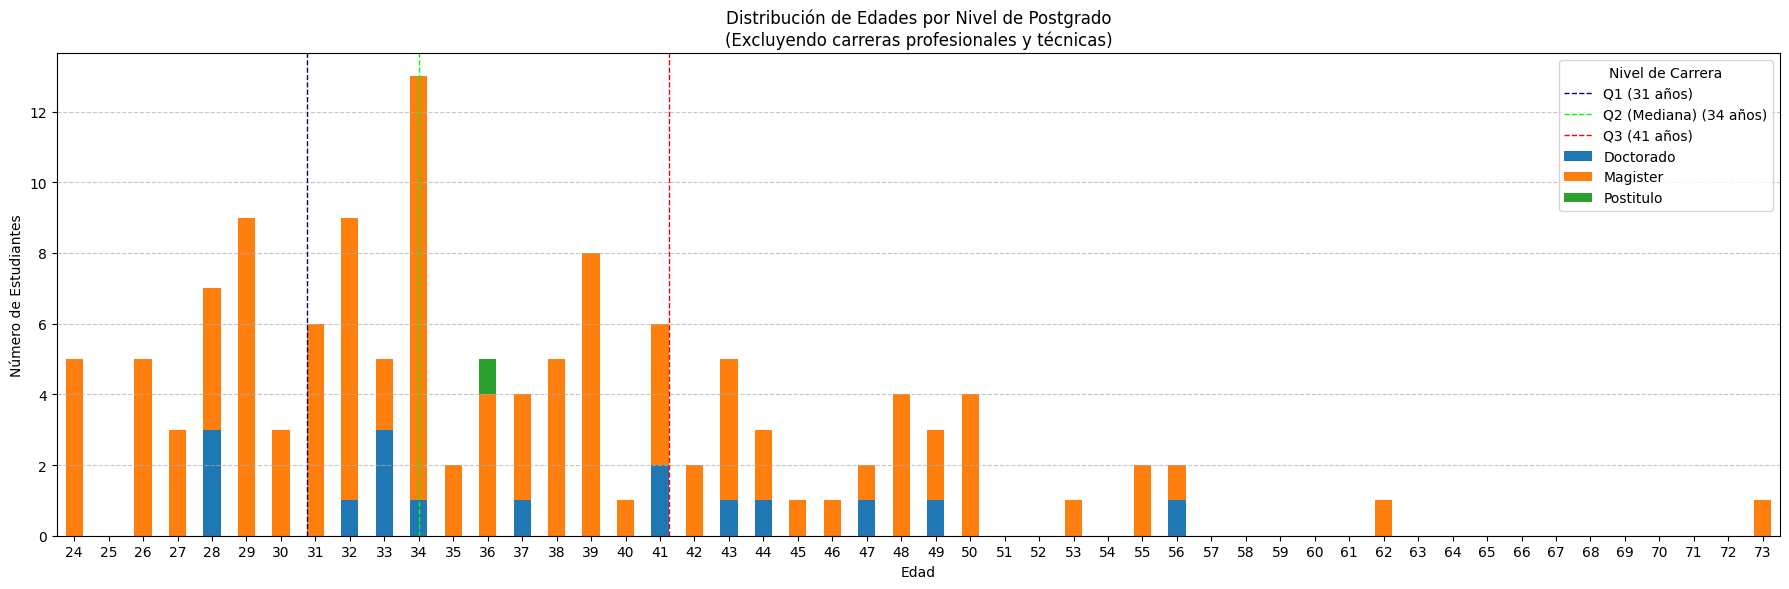

In [ ]:
df_filtrado = dataFrame[ (dataFrame['NIVEL CARRERA'] != "Carreras Profesionales") & (dataFrame['NIVEL CARRERA'] != "Carreras Tecnicas")]


min_age = df_filtrado['EDAD'].min()
max_age = df_filtrado['EDAD'].max()
edades_completas = np.arange(min_age, max_age + 1)


pivot = df_filtrado.pivot_table(index='EDAD', columns='NIVEL CARRERA', aggfunc='size', fill_value=0)
pivot = pivot.reindex(edades_completas, fill_value=0)

niveles = pivot.columns

# plot barras apiladas
fig, ax = plt.subplots(figsize=(18,6))
pivot.plot(kind='bar', stacked=True, ax=ax)


# percentiles
p25 = np.percentile(df_filtrado['EDAD'], 25)
p50 = np.percentile(df_filtrado['EDAD'], 50)
p75 = np.percentile(df_filtrado['EDAD'], 75)



def age_to_pos(age):
    return float(age) - float(min_age)



# dibujar Percentiles
ax.axvline(age_to_pos(p25), color='navy', linestyle='--', linewidth=1, label=f'Q1 ({p25:.0f} años)')
ax.axvline(age_to_pos(p50), color='lime', linestyle='--', linewidth=1, label=f'Q2 (Mediana) ({p50:.0f} años)')
ax.axvline(age_to_pos(p75), color='red', linestyle='--', linewidth=1, label=f'Q3 ({p75:.0f} años)')


ax.set_title("Distribución de Edades por Nivel de Postgrado\n(Excluyendo carreras profesionales y técnicas)")
ax.set_xlabel("Edad")
ax.set_ylabel("Número de Estudiantes")
ax.set_xticks(np.arange(len(edades_completas)))
ax.set_xticklabels(edades_completas, rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Nivel de Carrera", loc='upper right')
plt.tight_layout()
plt.show()


A partir del análisis con .describe() y la proporción de género de los estudiantes, se observa que la mayoría corresponde a mujeres jóvenes entre 20 y 24 años. Tanto el gráfico como los datos de edad lo confirman.

El promedio, la mediana y la moda de la edad no superan los 26 años, lo que refleja que la población estudiantil es principalmente joven. Sin embargo, la desviación estándar de 7,43 añoevidencia que también existen estudiantes de edades más variadas, lo que hace al grupo heterogéneo.

Analizando los gráficos de edad, excluyendo carreras profesionales y técnicas, la mayoría de los estudiantes tiene entre 18 y 27 años, ya que recién salido del colegio lo común es trabajar o estudiar una carrera. En cambio, el primer cuartil del gráfico anterior muestra que entre 31 y 41 años se concentran quienes cursan postítulos o magísteres, por el mismo motivo.

Finalmente, el análisis de la modalidad de estudio muestra que predomina la presencial, destacando claramente la jornada diurna por sobre la vespertina.

### Relacionar el tipo de insti con el área

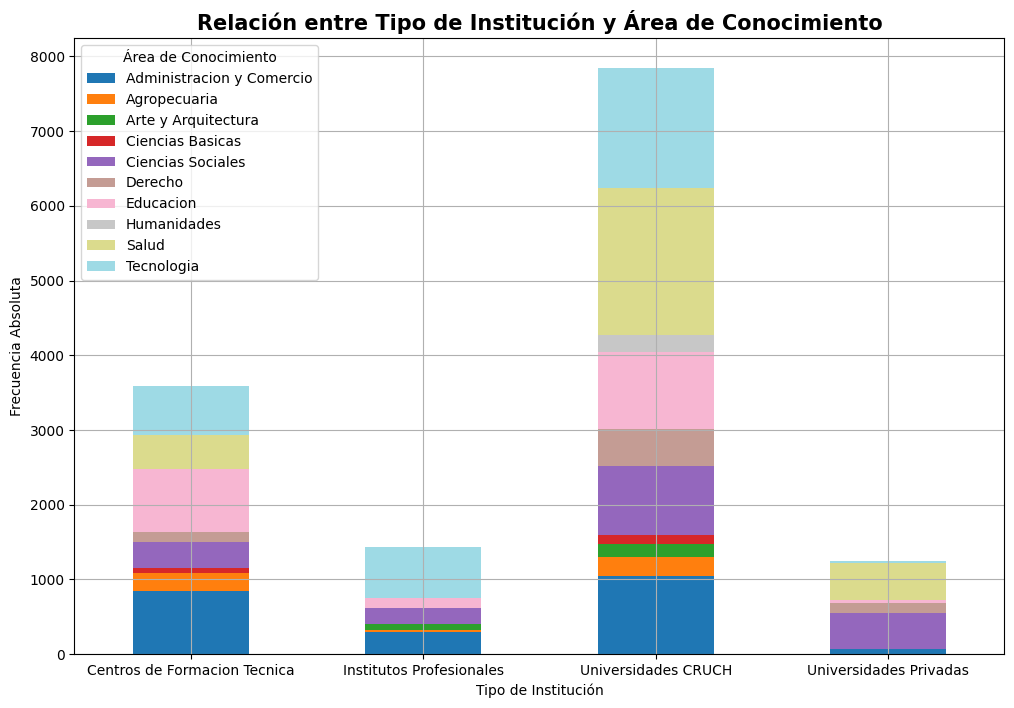

In [78]:

relacion = dataFrame.groupby(['TIPO DE INSTITUCION', 'AREA CONOCIMIENTO']).size().unstack(fill_value=0)


relacion.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12,8),
    colormap='tab20'
)

plt.title("Relación entre Tipo de Institución y Área de Conocimiento", fontsize=15, fontweight='bold')
plt.xlabel("Tipo de Institución")
plt.ylabel("Frecuencia Absoluta")
plt.legend(title='Área de Conocimiento', loc='upper left')
plt.xticks(rotation=0)
plt.grid()

plt.show()


### Carrera más cara por área





In [ ]:
dataFrame["TOTAL"] = dataFrame["VALOR MATRICULA (PESOS)"]*2 + dataFrame["VALOR ARANCEL (PESOS)"]



mas_cara_por_area = dataFrame.loc[
    dataFrame.groupby("AREA CONOCIMIENTO")["TOTAL"].idxmax(),
    ["AREA CONOCIMIENTO", "NOMBRE CARRERA", "TOTAL"]
]

mas_cara_por_area = mas_cara_por_area.sort_values(by="TOTAL", ascending=False).reset_index(drop=True)

print(mas_cara_por_area)


           AREA CONOCIMIENTO               NOMBRE CARRERA    TOTAL
0                      Salud                     MEDICINA  5905000
1               Agropecuaria                    AGRONOMIA  4325000
2                    Derecho                      DERECHO  4305000
3                 Tecnologia  INGENIERIA CIVIL INDUSTRIAL  4115000
4          Ciencias Sociales                 ANTROPOLOGIA  3869000
5  Administracion y Comercio         INGENIERIA COMERCIAL  3843000
6           Ciencias Basicas        QUIMICO LABORATORISTA  3843000
7        Arte y Arquitectura            DISENO MULTIMEDIA  3673000
8                Humanidades       LICENCIATURA EN INGLES  3344000
9                  Educacion       DOCTORADO EN EDUCACION  3340000
